# Visualize Raw Data

Get the example data file:

https://drive.google.com/file/d/1tjOfxj1WuvMF3uBUHLXTGfs6dUUr1QaC/view?usp=drive_link

The code below assume that you have it in your "Downloads" folder, modify the filename location otherwise


In [1]:
# filename:            /!\ modify if it is not in your "Downloads" folder
import os
filename = os.path.join(os.path.expanduser('~'), 'Downloads', '2023_12_20-15-27-46.nwb')

In [2]:
# general python modules for scientific analysis
import sys, pathlib, os
import numpy as np

# add the python path:
sys.path.append('../src')
from physion.utils import plot_tools as pt
from physion.analysis.read_NWB import Data, scan_folder_for_NWBfiles

import warnings
warnings.filterwarnings("ignore") # disable the UserWarning from pynwb (arrays are not well oriented)

 /!\  "svgutils" not installed ! get it with: "pip install svgutils" 


In [3]:
# load a datafile
#filename = os.path.join(os.path.expanduser('~'), 
#                        'CURATED', 'Pyr-FlexiCortPrelim-FebJuly2022', '2022_07_07-14-45-08.nwb')
data = Data(filename,
            verbose=False)
data.build_rawFluo(verbose=False)
data.build_dFoF(verbose=False)

## Showing Field of View

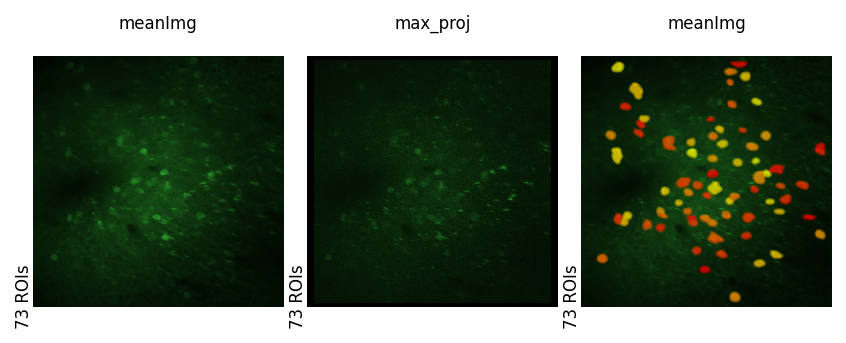

In [4]:
fig, AX = pt.figure(axes=(3,1), figsize=(1.4,3), wspace=0.15)

from physion.dataviz.imaging import show_CaImaging_FOV
#
show_CaImaging_FOV(data, key='meanImg', 
                   cmap=pt.get_linear_colormap('k', 'tab:green'),
                   NL=2, # non-linearity to normalize image
                   ax=AX[0])
show_CaImaging_FOV(data, key='max_proj', 
                   cmap=pt.get_linear_colormap('k', 'tab:green'),
                   NL=2, # non-linearity to normalize image
                   ax=AX[1])
show_CaImaging_FOV(data, key='meanImg', 
                   cmap=pt.get_linear_colormap('k', 'tab:green'),
                   NL=2,
                   roiIndices=range(data.nROIs), 
                   ax=AX[2])

# save on desktop
fig.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'FOV.png'))

# Show Raw Data

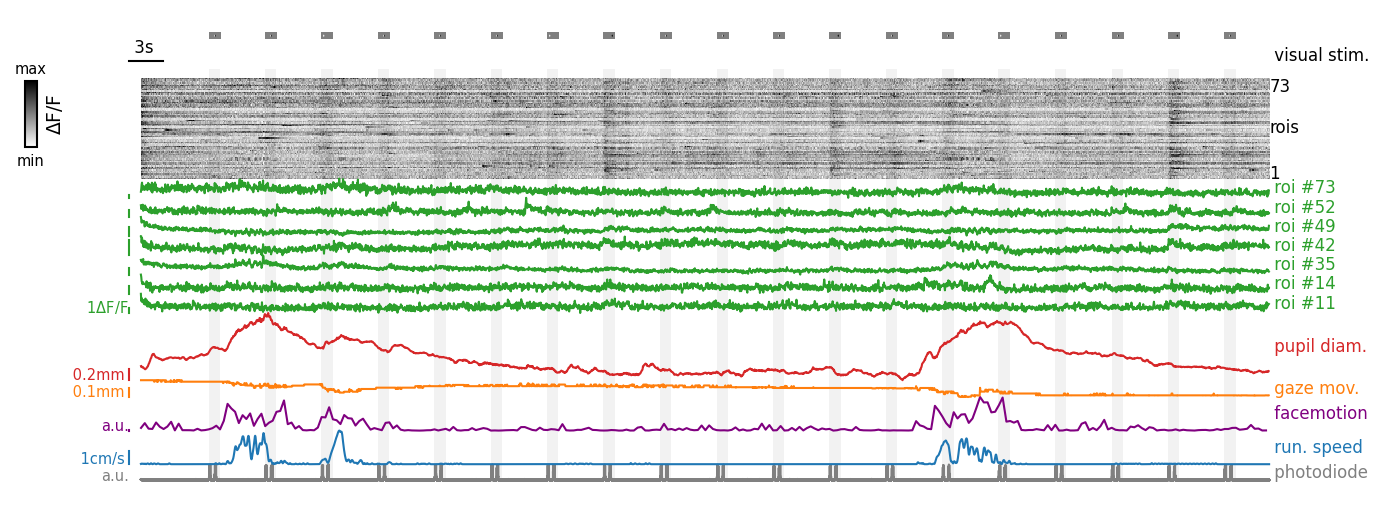

In [5]:
# default plot
from physion.dataviz.raw import plot as plot_raw, find_default_plot_settings
settings = find_default_plot_settings(data)
_ = plot_raw(data, settings=settings)

## Full view

(<Figure size 1500x600 with 1 Axes>, <Axes: >)

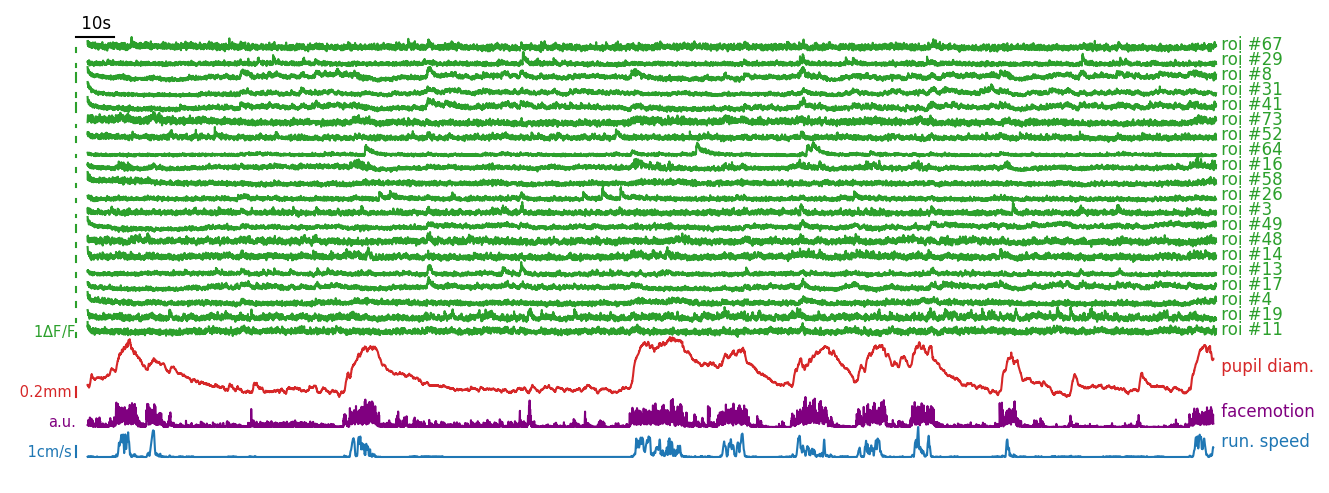

In [6]:
settings = {'Locomotion': {'fig_fraction': 1,
                           'subsampling': 1,
                           'color': '#1f77b4'},
            'FaceMotion': {'fig_fraction': 1,
                           'subsampling': 1,
                           'color': 'purple'},
            'Pupil': {'fig_fraction': 2,
                      'subsampling': 1,
                      'color': '#d62728'},
             'CaImaging': {'fig_fraction': 10,
                           'subsampling': 1,
                           'subquantity': 'dF/F',
                           'roiIndices': np.random.choice(np.arange(data.nROIs), np.min([20,data.nROIs]), replace=False),
                           'color': '#2ca02c'}
           }
plot_raw(data, tlim=[0, data.t_dFoF[-1]], settings=settings)